In [1]:
import sys
sys.path.append("../src")

from data_loader import WildFireDataLoader
from model_loader import ModelLoader
from evaluator import ModelEvaluator

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

In [2]:
data_loader = WildFireDataLoader("../data/v2/Data")
data_dict = data_loader.load_all_data()
train_df = data_dict["train"]
test_df = data_dict["test"]

print(f"Тренировочные данные: {len(train_df)}")
print(f"Тестовые данные: {len(test_df)}")
print("\nРаспределение классов в тестовых данных:")
print(test_df['class_name'].value_counts())

INFO:data_loader:Загрузка данных...
INFO:data_loader:Поиск данных в: ../data/v2/Data
INFO:data_loader:Структура: {'train_exists': True, 'test_exists': True, 'train_subfolders': ['Fire', 'Non_Fire'], 'test_subfolders': ['Fire', 'Non_Fire'], 'image_formats': {<built-in method lower of str object at 0x730fb89d1740>, <built-in method lower of str object at 0x730fb89d1650>, <built-in method lower of str object at 0x730fb89d1f20>, <built-in method lower of str object at 0x730fb89d1f50>, <built-in method lower of str object at 0x730fb8991fb0>, <built-in method lower of str object at 0x730fb896ffc0>, <built-in method lower of str object at 0x730fb89d1fb0>, <built-in method lower of str object at 0x730fb89d1fe0>, <built-in method lower of str object at 0x730fb89d1e00>, <built-in method lower of str object at 0x730fb89d1e30>, <built-in method lower of str object at 0x730fb89d1e60>, <built-in method lower of str object at 0x730fb89d1e90>, <built-in method lower of str object at 0x730fb8991ec0>, <

Тренировочные данные: 5000
Тестовые данные: 50

Распределение классов в тестовых данных:
class_name
Fire        25
Non_Fire    25
Name: count, dtype: int64


In [3]:
model_loader = ModelLoader("cuda")
models_dict = model_loader.load_all_models()

INFO:model_loader:Используется устройство: cuda
INFO:model_loader:Загрузка всех моделей...
INFO:model_loader:Загрузка модели: Gurveer05/vit-base-patch16-224-in21k-fire-detection
INFO:model_loader:Модель base успешно загружена. Параметров: 85,800,194
INFO:model_loader:Загрузка модели: EdBianchi/vit-fire-detection
INFO:model_loader:Модель finetuned успешно загружена. Параметров: 85,800,963
INFO:model_loader:Загружено 2 из 2


In [4]:
evaluator = ModelEvaluator(data_loader, model_loader, batch_size = 64)

In [6]:
test_results = {}
for model_key in ['base', 'finetuned']:
    print(f"\nОценка модели: {model_key}")
    metrics = evaluator.evaluate_model(model_key, train_df)
    test_results[model_key] = metrics

    print(f"  Accuracy:  {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1-Score:  {metrics['f1']:.4f}")
    print(f"  TP/FP/FN/TN: {metrics['tp']}/{metrics['fp']}/{metrics['fn']}/{metrics['tn']}")

INFO:evaluator:Оценка модели base на 5000 изображениях...



Оценка модели: base


100%|██████████| 79/79 [00:31<00:00,  2.47it/s]
INFO:evaluator:Оценка модели finetuned на 5000 изображениях...


  Accuracy:  0.9924
  Precision: 0.9920
  Recall:    0.9940
  F1-Score:  0.9930
  TP/FP/FN/TN: 2485/20/15/2091

Оценка модели: finetuned


100%|██████████| 79/79 [00:30<00:00,  2.63it/s]

  Accuracy:  0.9985
  Precision: 0.9980
  Recall:    0.9992
  F1-Score:  0.9986
  TP/FP/FN/TN: 2498/5/2/2106


In [8]:
comparison_df = evaluator.compare_models("train")
print(comparison_df[["model_key", "accuracy", "precision", "recall", "f1"]].to_string())

INFO:evaluator:Сравнение моделей на train...
INFO:evaluator:Оценка модели base на 5000 изображениях...
100%|██████████| 79/79 [00:29<00:00,  2.64it/s]
INFO:evaluator:Оценка модели finetuned на 5000 изображениях...
100%|██████████| 79/79 [00:28<00:00,  2.75it/s]

   model_key  accuracy  precision  recall        f1
0       base  0.992409   0.992016  0.9940  0.993007
1  finetuned  0.998482   0.998002  0.9992  0.998601


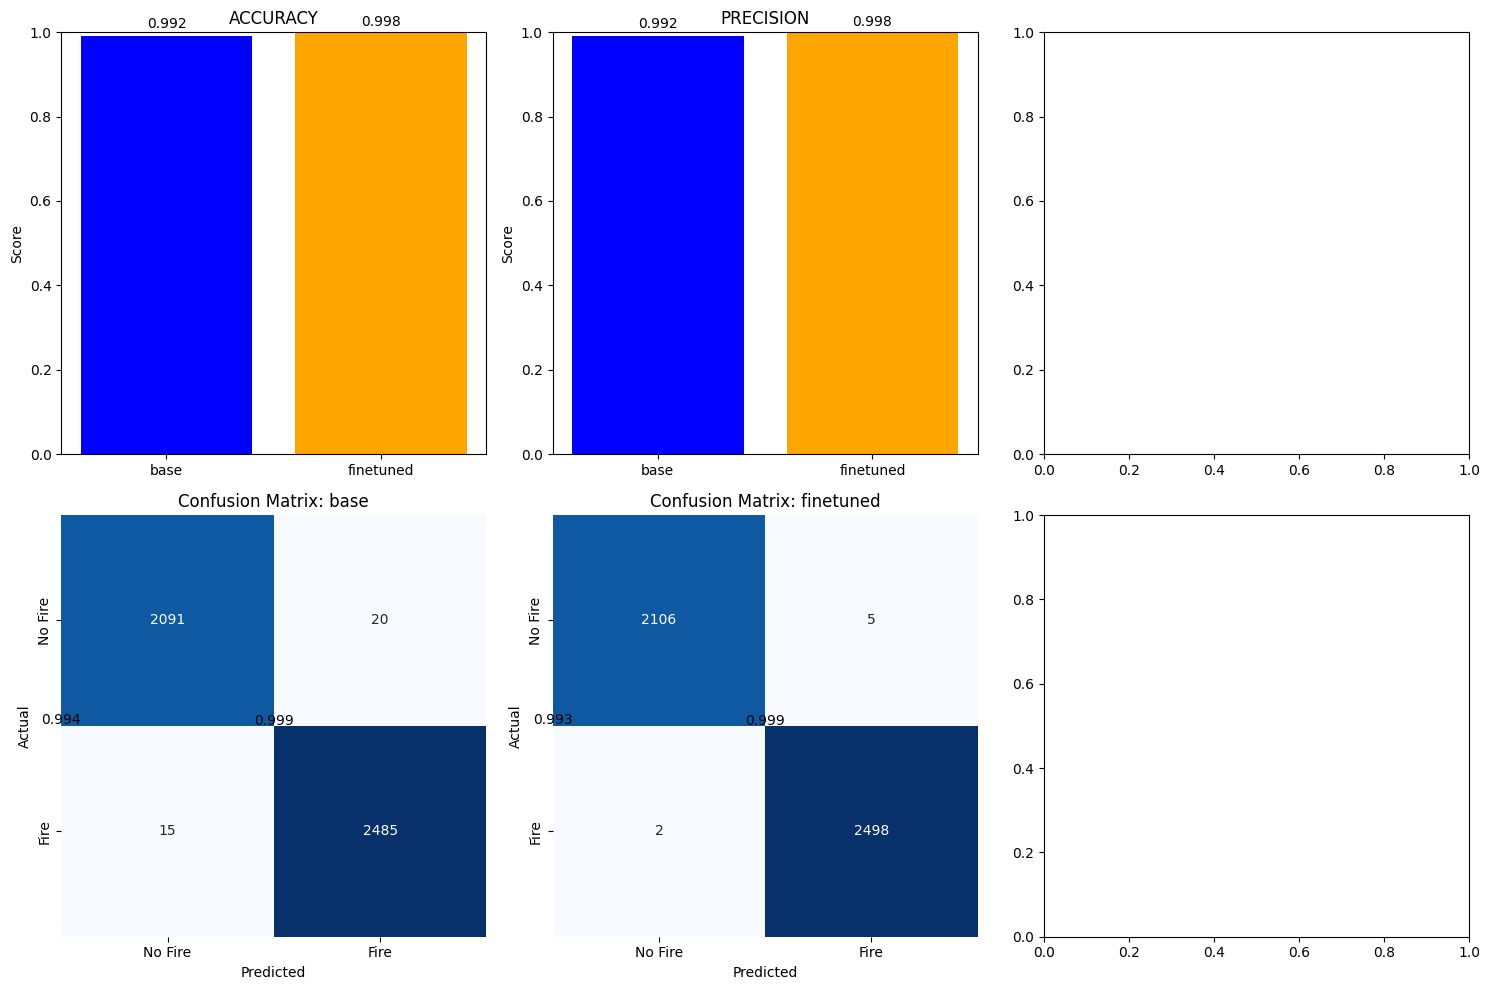

In [9]:
evaluator.plot_comparison(comparison_df, save_path='../outputs/figures/model_comparison.png')